## Modules

In [ ]:
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import numpy as np

# BRUSSELATOR 

## Creation of a class for the model

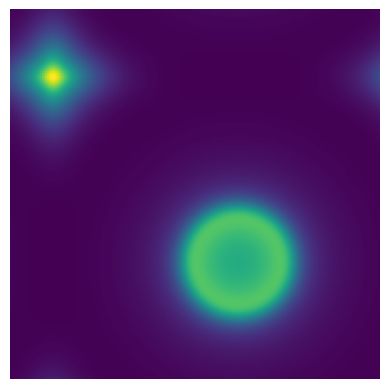

In [ ]:
class Brusselator():
    kernel = [
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1],
    ]
    boundary = "wrap"

    def diffusion(self, t):
        from_neighbs_X = convolve2d(
            self.X[t],
            self.kernel,
            boundary=self.boundary,
            mode="same",
        )
        next_X = (
            self.mu_x
            / (self.dx * self.dy)
            * (from_neighbs_X - self.nb_neighbs * self.X[t])
        )

        from_neighbs_Y = convolve2d(
            self.Y[t],
            self.kernel,
            boundary=self.boundary,
            mode="same",
        )
        next_Y = (
            self.mu_y
            / (self.dx * self.dy)
            * (from_neighbs_Y - self.nb_neighbs * self.Y[t])
        )

        return next_X, next_Y

    def reaction(self, t):
        x = self.X[t]
        y = self.Y[t]
        dx = self.A_param + x**2 * y - (self.B_param + 1) * x
        dy = self.B_param * x - x**2 * y
        return dx, dy

    def run(self):
        for t in range(self.n - 1):
            reac_x, reac_y = self.reaction(t)
            diff_x, diff_y = self.diffusion(t)
            self.X[t + 1] = self.X[t] + (reac_x + diff_x) * self.dt
            self.Y[t + 1] = self.Y[t] + (reac_y + diff_y) * self.dt 

    def plot_reactions(self, step=None):
        plt.imshow(self.X[self.n-1], cmap="viridis")
        plt.axis('off')
        plt.show()

    def save_gif(self, filename, every=50, duration=0.05, cmap="viridis"):

        from imageio import mimsave
        frames = []
        vmin = self.X.min()
        vmax = self.X.max()

        for t in range(0, self.n, every):
            fig, ax = plt.subplots(figsize=(4, 4))
            ax.imshow(self.X[t], cmap=cmap, vmin=vmin, vmax=vmax)
            ax.set_axis_off()

            fig.canvas.draw()
            buf = np.asarray(fig.canvas.buffer_rgba())
            image = buf[:, :, :3]
            frames.append(image)

            plt.close(fig)

        mimsave(filename, frames, duration=duration)


    def __init__(self, A=1.0, B=3.0, mu_x=2.0, mu_y=0.2, size=100, T=1, dt=0.01, dx=1, dy=1, **kwargs):
        
        np.random.seed(42)

        self.A_param = A
        self.B_param = B
        self.mu_x = mu_x
        self.mu_y = mu_y
        self.size = size
        self.n = int(T / dt)
        self.T = T
        self.dt = dt
        self.dx = dx
        self.dy = dy

        i = np.random.randint(0, self.size)
        j = np.random.randint(0, self.size)
        v = np.random.random()

        self.X = np.zeros((self.n, self.size, self.size))
        self.Y = np.zeros((self.n, self.size, self.size))

        self.X[0,:,:] = self.A_param
        self.Y[0,:,:] = self.B_param / self.A_param

        self.X[0, i, j] = self.A_param + v
        self.Y[0, i, j] = self.B_param / self.A_param - v        



        self.nb_neighbs = convolve2d(
            np.ones_like(self.X[0]),
            self.kernel,
            boundary=self.boundary,
            mode="same",
        )

## Runs the model and plot the result

In [ ]:
brusselator = Brusselator(size=100, T=50)
brusselator.run()

brusselator.plot_reactions()

## Create and save a GIF of the model

In [ ]:
brusselator.save_gif(filename="Brusselator.gif",every=50,duration=0.04)

# GRAY SCOTT

## Creation of a class for the model

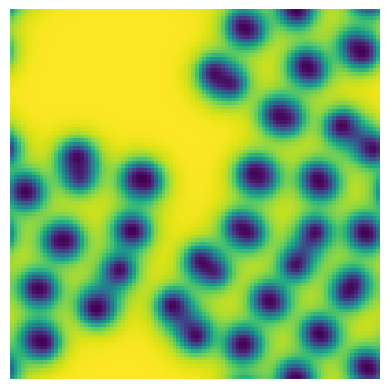

In [ ]:
class Gray_Scott():
    kernel = [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0],
    ]
    boundary = "wrap"

    def diffusion(self, t):
        from_neighbs_U = convolve2d(
            self.U[t],
            self.kernel,
            boundary=self.boundary,
            mode="same",
        )
        next_U = (
            self.mu_u
            / (self.dx * self.dy)
            * (from_neighbs_U - self.nb_neighbs * self.U[t])
        )

        from_neighbs_V = convolve2d(
            self.V[t],
            self.kernel,
            boundary=self.boundary,
            mode="same",
        )
        next_V = (
            self.mu_v
            / (self.dx * self.dy)
            * (from_neighbs_V - self.nb_neighbs * self.V[t])
        )

        return next_U, next_V

    def reaction(self, t):
        u = self.U[t]
        v = self.V[t]
        dx = - u * v**2 + self.F * (1 - u)
        dy = u * v**2 - (self.F + self.k) * v
        return dx, dy

    def run(self):
        for t in range(self.n - 1):
            reac_u, reac_v = self.reaction(t)
            diff_u, diff_v = self.diffusion(t)
            self.U[t + 1] = self.U[t] + (reac_u + diff_u) * self.dt
            self.V[t + 1] = self.V[t] + (reac_v + diff_v) * self.dt 

    def plot_reactions(self, step=None):
        plt.imshow(self.U[self.n-1], cmap="viridis")
        plt.axis('off')
        plt.show()
        
    def save_gif(self, filename, every=50, duration=0.05, cmap="viridis"):

        from imageio import mimsave
        frames = []
        vmin = self.U.min()
        vmax = self.U.max()

        for t in range(0, self.n, every):
            fig, ax = plt.subplots(figsize=(4, 4))
            ax.imshow(
                self.U[t],
                cmap=cmap,
                vmin=vmin,
                vmax=vmax,
            )
            ax.set_axis_off()

            fig.canvas.draw()
            buf = np.asarray(fig.canvas.buffer_rgba())
            image = buf[:, :, :3]
            frames.append(image)

            plt.close(fig)

        mimsave(filename, frames, duration=duration)

    def __init__(self, F=0.03, k=0.063, mu_u=0.2, mu_v=0.1, size=100, T=1, dt=1, dx=1, dy=1, **kwargs):
        
        np.random.seed(42)

        self.F = F
        self.k = k
        self.mu_u = mu_u
        self.mu_v = mu_v
        self.size = size
        self.n = int(T / dt)
        self.T = T
        self.dt = dt
        self.dx = dx
        self.dy = dy

        self.U = np.zeros((self.n, self.size, self.size))
        self.V = np.zeros((self.n, self.size, self.size))

        self.U[0][:] = 1
        self.V[0][:] = 0

        for _ in range(5): 
            i = np.random.randint(0, self.size)
            j = np.random.randint(0, self.size)
            self.V[0, i, j] = 1    



        self.nb_neighbs = convolve2d(
            np.ones_like(self.U[0]),
            self.kernel,
            boundary=self.boundary,
            mode="same",
        )

## Runs the model and plot the result

In [ ]:
gray_scott = Gray_Scott(size=100, T=2500)
gray_scott.run()

gray_scott.plot_reactions()

## Create and save a GIF of the model

In [ ]:
gray_scott.save_gif(filename="Gray_scott.gif",every=50,duration=0.04)